In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
class LinearRegression () :

    def __init__(self, lr, n_itr) :
        self.lr = lr
        self.n_itr = n_itr
        
        self.cost_values = []
        self.ls_w_values = []
        self.ls_b_values = []
        self.ls_y_preds =[]
    
    def fit_line(self, X_tr, y_tr) :
        """
        X_tr : 2D Numpy array with all the feature values, after feature scaling
        y_tr : 1D Numpy array with the corresponding sale prices
        """
        self.n_samples, self.n_features = X_tr.shape
        self.weights = np.zeros(self.n_features)
        self.bias = 0
        self.X_tr = X_tr
        self.y_tr = y_tr

        self.gradient_descent()
        

    #Gradient Descenet
    def gradient_descent(self) :
        for _ in range(self.n_itr) :

            #List of predictions for current weights and bias
            y_preds = self.f_wb(self.X_tr)

            #Save values for current weights and bial (every n iterations)
            if(self.n_itr%1000 == 0) :
                self.cost_values.append(self.J_wb(y_preds))
                self.ls_w_values.append(self.weights)
                self.ls_b_values.append(self.bias)
                self.ls_y_preds.append(self.ls_y_preds)

            #Update the weights and bias
            self.update_wb()

    #Update weights and bias    
    def update_wb(self) :

        #Calculating Gradients
        dw = (1/self.n_samples) * np.dot( self.X_tr.T , ( self.f_wb(self.X_tr) - self.y_tr ) )
        db = (1/self.n_samples) * np.sum( self.f_wb(self.X_tr) - self.y_tr )
        
        #Update
        self.weights -= self.lr * dw
        self.bias -= self.lr * db


    #Helper functions  

    #cost function
    def J_wb(self, y_hat) :
        return ( 1 / 2*self.n_samples) * np.sum(np.square(y_hat - self.y_tr))

    #hypothesis
    def f_wb(self, X) :
        #print( X.dot(self.weights) + self.bias )
        return np.dot(self.weights, X.T) + self.bias
        

        

In [4]:
#IMPORTING THE DATA
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

#FEATURE ENGINEERING

#selecting all the features

features=list(train)
features.pop()          #remove SalePrice

#OR - 
#selecting a particular set of the features instead of all
"""
features = [
    'OverallQual', 
    'GrLivArea', 
    'TotalBsmtSF', 
    '1stFlrSF', 
    'YearBuilt', 
    ]
"""
print(features)

#get X_train and y_train arrays

X_train = np.array( train.loc[:, features].values )
y_train = np.array( train.loc[:, 'SalePrice'].values )

X_test = np.array( test.loc[:, features].values )
y_test = np.array( test.loc[:, 'SalePrice'].values )

print('\nX_train - \n', X_train)
print('\ny_train - \n', y_train)
print('\nX_test - \n', X_test)
print('\ny_test - \n', y_test)



['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']

X_train - 
 [[   7 1820    1 ...    8 1925 1950]
 [   7 1646    1 ...    7 1941 1950]
 [   5 1316    2 ...    6 1929 2001]
 ...
 [   5  789    1 ...    5 1948 1950]
 [   6 1661    1 ...    8 1955 1996]
 [   7 1442    2 ...    5 1990 1990]]

y_train - 
 [184000 164000 130000 ... 115000 165500 180500]

X_test - 
 [[   8 1970    3 ...    8 2006 2006]
 [   6 1632    1 ...    6 1958 1988]
 [   7 1223    2 ...    4 2005 2005]
 ...
 [   6  848    2 ...    4 2003 2003]
 [   7 1266    2 ...    6 2007 2007]
 [   6 1484    2 ...    8 2005 2007]]

y_test - 
 [281000 139000 147400 153500  86000 127500 127500 180000 178000 153337
 224500 136500 143000 153500 242000 124900 215000 164000 145000 149300
 172500 230000 179665 135000 222000 164900 197900 113000 148500 185000
 297000 228950 176000 149000 180000 150000  35311 270000 556581 173900
 135000  95000  84000

In [5]:
# FEATURE SCALLING

#print(X_train)
#print(X_train.T)
X_new=[]
for feature_list in X_train.T :
    feature_list = ( feature_list - feature_list.mean() ) / (feature_list.max() - feature_list.min()) 
    #print('Modified feature lis - \n', feature_list)
    X_new.append(feature_list)
X_train = np.array(X_new)
X_train = X_train.T

X_new=[]
for feature_list in X_test.T :
    feature_list = ( feature_list - feature_list.mean() ) / (feature_list.max() - feature_list.min()) 
    #print('Modified feature lis - \n', feature_list)
    X_new.append(feature_list)
X_test = np.array(X_new)
X_test = X_test.T

print('\nX_train = \n', np.round(X_train, 5))
print('\n X_test = \n', np.round(X_test, 5))



X_train = 
 [[ 0.09941  0.05623 -0.19371 ...  0.14709 -0.3359  -0.57851]
 [ 0.09941  0.02345 -0.19371 ...  0.04709 -0.21911 -0.57851]
 [-0.12281 -0.03872  0.05629 ... -0.05291 -0.3067   0.27149]
 ...
 [-0.12281 -0.138   -0.19371 ... -0.15291 -0.16801 -0.57851]
 [-0.0117   0.02628 -0.19371 ...  0.14709 -0.11692  0.18816]
 [ 0.09941 -0.01498  0.05629 ... -0.15291  0.13855  0.08816]]

 X_test = 
 [[ 0.21385  0.15305  0.31592 ...  0.13885  0.25948  0.34189]
 [-0.00837  0.045   -0.18408 ... -0.04296 -0.10975  0.04189]
 [ 0.10274 -0.08576  0.06592 ... -0.22478  0.25179  0.32523]
 ...
 [-0.00837 -0.20564  0.06592 ... -0.22478  0.23641  0.29189]
 [ 0.10274 -0.07201  0.06592 ... -0.04296  0.26718  0.35856]
 [-0.00837 -0.00232  0.06592 ...  0.13885  0.25179  0.35856]]


In [6]:
#FINAL DATA AFTER PREPROCESSING
print('\nX_train - \n', X_train)
print('\ny_train - \n', y_train)
print('\nX_test - \n', X_test)
print('\ny_test - \n', y_test)


X_train - 
 [[ 0.0994102   0.05623281 -0.19370719 ...  0.14708904 -0.33589766
  -0.57851027]
 [ 0.0994102   0.0234521  -0.19370719 ...  0.04708904 -0.21910934
  -0.57851027]
 [-0.12281202 -0.03871821  0.05629281 ... -0.05291096 -0.30670058
   0.27148973]
 ...
 [-0.12281202 -0.13800231 -0.19370719 ... -0.15291096 -0.16801445
  -0.57851027]
 [-0.01170091  0.02627802 -0.19370719 ...  0.14708904 -0.11691956
   0.18815639]
 [ 0.0994102  -0.01498046  0.05629281 ... -0.15291096  0.13855489
   0.08815639]]

y_train - 
 [184000 164000 130000 ... 115000 165500 180500]

X_test - 
 [[ 0.21385084  0.15305197  0.31592466 ...  0.1388543   0.25948367
   0.34189498]
 [-0.00837139  0.04499571 -0.18407534 ... -0.04296389 -0.1097471
   0.04189498]
 [ 0.10273973 -0.08575877  0.06592466 ... -0.22478207  0.25179136
   0.32522831]
 ...
 [-0.00837139 -0.20564368  0.06592466 ... -0.22478207  0.23640674
   0.29189498]
 [ 0.10273973 -0.07201196  0.06592466 ... -0.04296389  0.26717597
   0.35856164]
 [-0.00837139

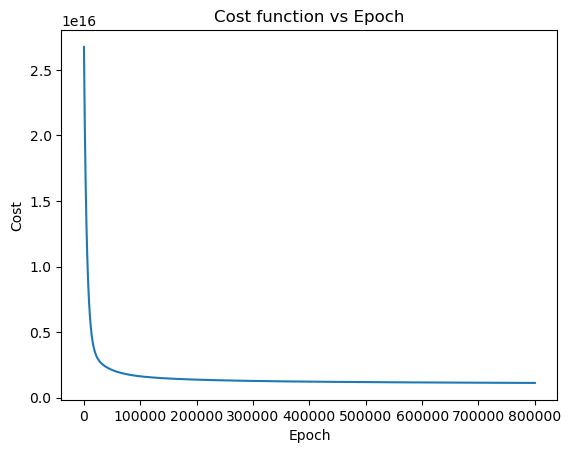

Final cost value =  1124969103724254.9


In [19]:
#Implementing Linear Regression to Data

house = LinearRegression(lr = 0.0001, n_itr = 800000)
house.fit_line(X_train, y_train)

#Plotting the graph to show cost value converging
plt.plot(range(house.n_itr), house.cost_values)
plt.title("Cost function vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.show()

print('Final cost value = ', house.cost_values[-1])


In [20]:
My_predictions = house.f_wb(X_test)
print('\n Predicted & Actual values side by side ~')
print('\n PREDICTED\t ACTUAL ')
for i in range(len(My_predictions)) :
    print( f"\n {np.round(My_predictions[i], 2)}\t {y_test[i]}" )


 Predicted & Actual values side by side ~

 PREDICTED	 ACTUAL 

 282530.59	 281000

 183570.69	 139000

 168022.93	 147400

 180956.26	 153500

 62495.97	 86000

 98751.64	 127500

 100677.03	 127500

 205375.46	 180000

 205891.7	 178000

 150358.09	 153337

 217946.89	 224500

 116475.05	 136500

 164559.78	 143000

 144544.72	 153500

 299988.23	 242000

 163964.65	 124900

 207050.24	 215000

 235893.44	 164000

 150685.95	 145000

 138088.12	 149300

 235256.45	 172500

 278148.54	 230000

 199144.05	 179665

 131419.81	 135000

 246261.19	 222000

 141528.67	 164900

 213966.03	 197900

 97304.11	 113000

 145991.59	 148500

 169142.28	 185000

 300408.52	 297000

 198350.35	 228950

 190314.25	 176000

 127495.31	 149000

 138135.46	 180000

 153959.63	 150000

 -3499.29	 35311

 235935.39	 270000

 391529.26	 556581

 186541.65	 173900

 138438.78	 135000

 119535.5	 95000

 55953.37	 84000

 60980.39	 82000

 136660.33	 124000

 155096.53	 152000

 80308.94	 109008

 239738.6

In [21]:
#Error and Accuracy

class Error() :
    def __init__(self, predicted, actual) :
        self.predicted = predicted
        self.actual = actual

        self.MSE = (np.mean(np.square(np.subtract(self.predicted, self.actual)))) / len(self.predicted)
        self.RMSE = np.sqrt(self.MSE)
        self.RMSPE = (np.sqrt(np.mean(np.square(((self.predicted - self.actual) / self.actual))))) * 100
        self.NRMSE = self.RMSE / (self.actual.max() - self.actual.min())
        self.r2 = 1 - (np.sum(np.square(self.actual - self.predicted)) / np.sum(np.square(self.actual - self.actual.mean())))
        

    def print_error(self) :

        print("\nRMSE (Root Mean Square) = \t", self.RMSE)
        print("\nNMRMS (Normalised RMSE) = \t", self.NRMSE)
        print("\nRMSPE (RMS Percentage) = \t", np.round(self.RMSPE, 2), '%')
        print("\nR2 (Squared Correlation) = \t", self.r2)
        print("\nAccuracy of model = \t\t", np.round(self.r2*100, 2), '%') 

In [22]:
#Error and Accuracy of the model
print('\nFinal ERROR & ACCURACY Analysis of the model ~ ')
error_final = Error(My_predictions, y_test)
error_final.print_error()




Final ERROR & ACCURACY Analysis of the model ~ 

RMSE (Root Mean Square) = 	 2086.2571617106432

NMRMS (Normalised RMSE) = 	 0.00400225825716163

RMSPE (RMS Percentage) = 	 25.61 %

R2 (Squared Correlation) = 	 0.789182599559749

Accuracy of model = 		 78.92 %
